# Why do we observe far less $\pi^-$ at small $\theta$ than $\pi^+$?

last edit May-4, 2022

## Imports and definitions

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/'); 
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

## Auxiliary functions

# load data 

In [3]:
main_data_path = '/Users/erezcohen/Desktop/data/BAND/SIDIS_skimming/'

In [27]:
eepims = dict()
labels = ['all','no cut','PID+fiducial cuts','kinematic cuts'];
eepims[labels[0]] = pd.read_csv(main_data_path + 'skimmed_SIDIS_inc_006422_e_piminus.csv');
eepims[labels[1]] = pd.read_csv(main_data_path + 'skimmed_SIDIS_inc_006422_e_piminus_selected_eepi.csv');
eepims[labels[2]] = pd.read_csv(main_data_path + 'skimmed_SIDIS_inc_006422_e_piminus_selected_eepi_kinematics.csv');

## Plot $p$ vs. $\theta$ for different sectors

In [28]:
bins = (np.linspace(1,3,100),np.linspace(0,40,100))
xticks = np.linspace(1,3,5)
yticks = np.linspace(0,40,5)

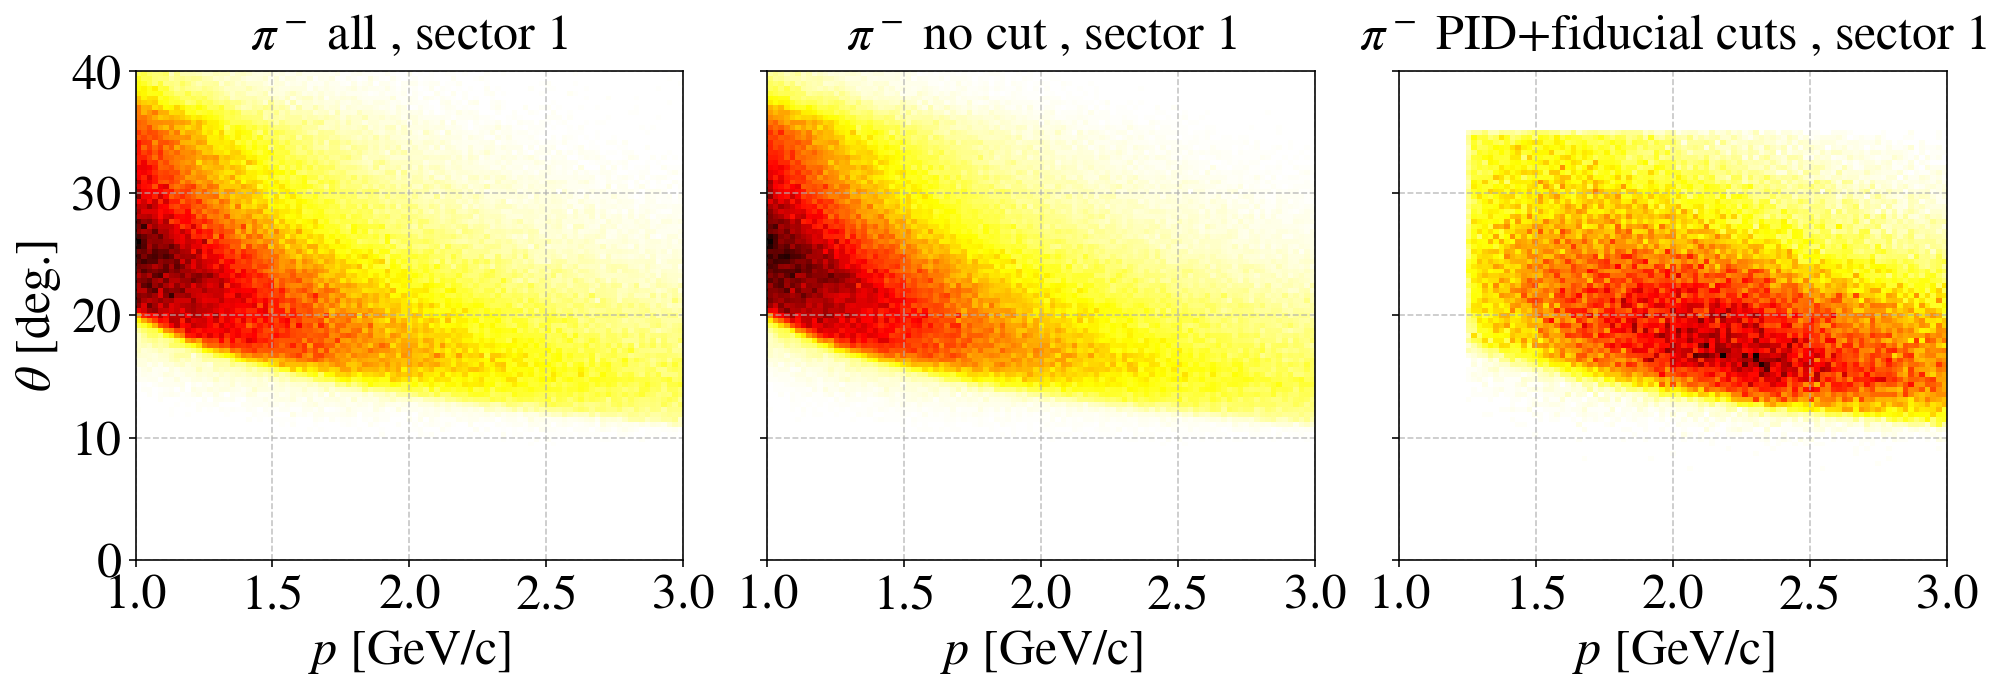

In [29]:
sector = 1
fig = plt.figure(figsize=(14,5))

for subset_idx,subset_label in zip([1,2,3],labels):
    df = eepims[subset_label]

    ax = fig.add_subplot(1,3,subset_idx)
    df_sector = df[df.pi_DC_sector == sector]

    plt.hist2d( df.pi_P, df.pi_Theta*r2d, cmap='hot_r',bins=bins, label='data');
    set_axes(ax,'$p$ [GeV/c]',
                 '$\\theta$ [deg.]' if subset_idx==1 else '',
             do_add_grid=True,
                 # remove_ticks_x = False if sector>3 else True,
                 remove_ticks_y = False if subset_idx==1 else True,
             title='$\pi^-$ '+ subset_label  +' , sector %d'%sector,
             xticks=xticks, yticks=yticks,                  
             do_add_legend=False)
plt.tight_layout()                   